https://github.com/pytorch/examples/blob/master/mnist/main.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

In [3]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

In [4]:
batch_size = 32
dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=False)

In [5]:
def draw_random_images(loader):
    rand_idxs = [np.random.randint(0, batch_size-1) for i in range (4)]
    for t in loader:
        X = t[0][rand_idxs]
        y = t[1][rand_idxs]

        print(X.shape, y.shape)

        f, axarr = plt.subplots(2,2)

        axarr[0,0].imshow(X[0].squeeze())
        axarr[0,0].set_title(str(y[0].item()))

        axarr[0,1].imshow(X[1].squeeze())
        axarr[0,1].set_title(str(y[1].item()))

        axarr[1,0].imshow(X[2].squeeze())
        axarr[1,0].set_title(str(y[2].item()))

        axarr[1,1].imshow(X[3].squeeze())
        axarr[1,1].set_title(str(y[3].item()))
        
        return X, y

torch.Size([4, 1, 28, 28]) torch.Size([4])


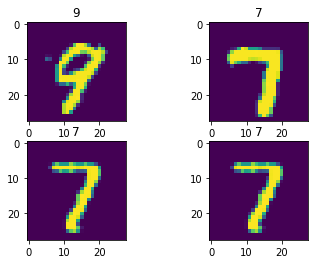

In [6]:
X, y = draw_random_images(train_loader)

In [7]:
class SimpleDenseNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleDenseNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc_output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return F.log_softmax(self.fc_output(x))
    

In [8]:
net = SimpleDenseNet(28*28).to(device)
net

SimpleDenseNet(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc_output): Linear(in_features=256, out_features=10, bias=True)
)

In [9]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Batch Accuracy: ', (torch.argmax(output,1) == target).sum().item()/batch_size)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [10]:
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [11]:
train(net, train_loader, optimizer, 50)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Batch Accuracy:  0.0625
Train Epoch: 50 [0/60000 (0%)]	Loss: 2.309382
Batch Accuracy:  0.0625
Train Epoch: 50 [1600/60000 (3%)]	Loss: 2.278246
Batch Accuracy:  0.125
Train Epoch: 50 [3200/60000 (5%)]	Loss: 2.302357
Batch Accuracy:  0.1875
Train Epoch: 50 [4800/60000 (8%)]	Loss: 2.257875
Batch Accuracy:  0.125
Train Epoch: 50 [6400/60000 (11%)]	Loss: 2.244210
Batch Accuracy:  0.25
Train Epoch: 50 [8000/60000 (13%)]	Loss: 2.249831
Batch Accuracy:  0.375
Train Epoch: 50 [9600/60000 (16%)]	Loss: 2.222300
Batch Accuracy:  0.375
Train Epoch: 50 [11200/60000 (19%)]	Loss: 2.196691
Batch Accuracy:  0.6875
Train Epoch: 50 [12800/60000 (21%)]	Loss: 2.123499
Batch Accuracy:  0.375
Train Epoch: 50 [14400/60000 (24%)]	Loss: 2.168510
Batch Accuracy:  0.46875
Train Epoch: 50 [16000/60000 (27%)]	Loss: 2.165680
Batch Accuracy:  0.53125
Train Epoch: 50 [17600/60000 (29%)]	Loss: 2.132019
Batch Accuracy:  0.625
Train Epoch: 50 [19200/60000 (32%)]	Loss: 2.083380
Batch Accuracy:  0.46875
Train Epoch: 50 [208

In [12]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [13]:
test(net, test_loader)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  



Test set: Average loss: 1.0964, Accuracy: 7860/10000 (79%)



torch.Size([4, 1, 28, 28]) torch.Size([4])


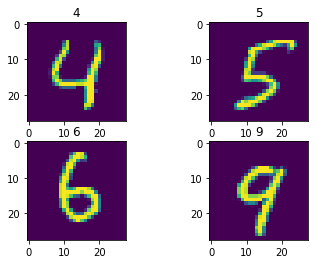

In [14]:
X, y = draw_random_images(test_loader)

In [15]:
predicted_y = net(X).argmax(1)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [16]:
predicted_y

tensor([4, 5, 6, 9])

In [17]:
y

tensor([4, 5, 6, 9])